# Luvuyo Magwaza

# Instructions

* Change "Your Name Here" to your name.
* Fill in the empty chunks with your code. 
* Do not add any code chunks in your final submission besides the ones already here. 
* Use **no** additional modules other than:
    - `numpy`
    - `matplotlib`
    - `statsmodels`

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import optimize

# Question 1

Consider 

$$
y = f(x) = -5x^2 + 5x
$$

## Question 1.1

Create an array `x` from -100 to 100 in steps of 0.01, then create `y` based on the $f(x)$, then plot it with labels. 

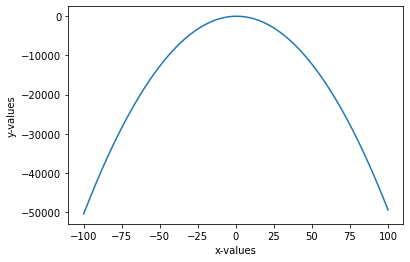

In [2]:
# your code here
x = np.arange(-100, 100, 0.01)
y = -5*(x**2) + 5*x

plt.plot(x,y)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.show()

## Question 1.2 

Solve for $x^*$ and typeset your solutions with $\LaTeX$.

Here are some helpful tips. When using $\LaTeX$ in Markdown (for instance, in a Jupyter notebook), you can create equation blocks with a double `$$...$$`, and you can align equations using `\begin{align} ... \end{align}`.

For instance, this:


```
\begin{align}
y &= f(x_1, x_2) \\
  &= x_1^2 + 2x_2^3
\end{align}
$$
```

produces

$$
\begin{align}
y &= f(x_1, x_2) \\
  &= x_1^2 + 2x_2^3
\end{align}
$$

and 

```
$$
\frac{\partial y}{\partial x_1} = 2_x_1
$$
```

produces

$$
\frac{\partial y}{\partial x_1} = 2x_1
$$

**[$$ \frac{\partial y}{\partial x} = -10x + 5 $$
 
\begin{align}
0 &= -10x + 5 \\
5 &= 10x \\
x^* &= 0.5
\end{align}
]**

## Question 1.3

Use `optimize.minimize()` from `scipy` to numerically solve the problem.

In [3]:
# def your objective function here
# your code here
def objective_function(x):
    return(-(-5*(x**2) + 5*x)) # have to multiply by -1 to make optimize.minimize work


In [4]:
# optimize it
# your code here
optimize.minimize(fun = objective_function, x0 = 0)

      fun: -1.25
 hess_inv: array([[1]])
      jac: array([8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.5])

## Question 1.4 

Confirm the value of the objective function at the optimal point.

In [5]:
# your code here
y = -5*(0.5**2) + 5*0.5
y

1.25

# Question 2

## Question 2.1

Simulate 1,000 draws from 

$$
y = 1 + 2x + \epsilon
$$

where $x$ and $\epsilon$ are distributed standard normal.

In [6]:
# your code here
x = np.random.normal(loc = 0, scale = 1, size = 1000)
epsilon = np.random.normal(loc = 0, scale = 1, size = 1000)
y = 1 + 2*x + epsilon


## Question 2.2 

Code a function `loss(b)` that implements

$$
\begin{aligned}
L(\beta) &= \sum_{i=1}^n (\hat{y} - y)^2 \\
         &= \sum_{i=1}^n (\beta_0 + \hat{\beta}_1 x - y)^2
\end{aligned}
$$

Your function should look like this:

```python
def loss(b):
    # predicted value given parameters `b`
    yhat = 
    # the error
    error = 
    # the sum of squared errors
    sse = 
    return(sse)
```

The argument `b` should be a list or numpy array. 

**Hint**: Remember you can subset an array `arr` with `[]` (e.g., `arr[0]` for the first element.

In [7]:
# your code here
def loss(b):
    
    # predicted value given parameters `b`
    yhat = b[0] + b[1]*x
    # the error
    error = np.sum(yhat - y)
    # the sum of squared errors
    sse = (error)**2
    return(sse)
    

## Question 2.2

Check the loss when $\beta_0 = 1$ and $\beta_1 = 2$:

In [8]:
# your code here
beta_values = np.array([1,2])
sse = loss(beta_values)
sse

794.0757064742602

## Question 2.3

Use `optimize.minimize` to optimize your loss function. 

**Hint**: You can pass a list or numpy array to `x0`.

In [9]:
# your code here

optimize.minimize(fun = loss, method = "TNC", x0 = beta_values)

     fun: 6.224699151465266e-12
     jac: array([ 0.01498987, -0.00021476])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 21
     nit: 2
  status: 1
 success: True
       x: array([0.97196343, 2.0030011 ])

# Question 3

Solve the same problem above (as in, use the same `x` and `y` and loss function) using gradient descent. 

Set: 

* `n_iter` to 1000
* `alpha` or `step_size` (pick one) to 0.01
* the starting value of `b0_hat` to -10
* the starting value of `b1_hat` to 10

Print your results -- **just the final values of the estimated parameters** -- at the end of your cell.

In [10]:
# your code here
def GD(b0_hat, b1_hat, step_size, n_iter):
    N = len(y) # use 1/N for computational purposes when finding the derivatives of b0_hat and b1_hat 
    b0_hat = b0_hat
    b1_hat = b1_hat
    for i in range(n_iter):
        dLdB1 = (1/N) * np.sum(x * (b0_hat + b1_hat*x - y))  
        dLdB0 = (1/N) * np.sum((b0_hat + b1_hat*x - y))
        b0_hat -= step_size * dLdB0
        b1_hat -= step_size * dLdB1
    return(b0_hat, b1_hat)

b0, b1 = GD(b0_hat = -10, b1_hat = 10, step_size = 0.01, n_iter = 1000)
print(b0, b1)
                         

0.9717536740856504 2.007240452897697
